In [37]:
from torchvision import datasets
import torchvision
import random
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import PIL

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#settings
random_seed = 42
batch_size = 128
num_epochs = 100

training_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.RandomCrop(size=(28,28)),
    torchvision.transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(), #scales input images
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=(32,32)),
    torchvision.transforms.CenterCrop(size=(28,28)),
    torchvision.transforms.Normalize(mean=(0.5, ), std=(0.5,)),
])

train_dataset = datasets.MNIST(root = 'data',
                               train = True,
                               transform = training_transforms,
                               download = True)
test_dataset = datasets.MNIST(root = 'data',
                              train = False,
                              transform = test_transforms)

train_loader = DataLoader(dataset = train_dataset,
                          batch_size = batch_size,
                          shuffle = True)

test_loader = DataLoader(dataset = test_dataset,
                         batch_size = batch_size,
                         shuffle = False)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1306: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


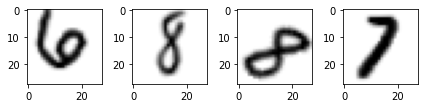

In [42]:
random.seed(0)
torch.manual_seed(0)


for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


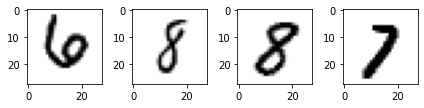

In [44]:
#compare without augmentation

train_dataset = datasets.MNIST(root='data',
                               train = True,
                               transform = torchvision.transforms.ToTensor(),
                               download = True)

trian_loader = DataLoader(dataset = train_dataset,
                          batch_size = batch_size,
                          shuffle=True)

torch.manual_seed(0)
for images, labels in train_loader:
    print("image batch dimensions:", images.shape)
    print("image label dimensions:", labels.shape)
    break

fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(images[i].view(28,28).numpy(), cmap='binary')

plt.tight_layout()